In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [13]:
stock_symbol = "ADVANC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")
df2

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK
Date,,,,,
2015-01-05,159.522568,162.725832,158.241262,161.444526,5232400
2015-01-06,158.241302,160.163262,156.959996,157.600649,4386200
2015-01-07,162.085220,162.085220,153.756731,157.600649,11060300
2015-01-08,160.163269,161.444575,158.881963,160.803922,6530700
2015-01-09,158.881912,160.803871,158.881912,160.803871,4615500
...,...,...,...,...,...
2023-03-03,187.384232,187.384232,184.615006,187.384232,4207500
2023-03-07,188.307281,189.230356,186.461132,188.307281,7244400


In [15]:
df2 = df2.drop(df2.index[[0, 1]])
df2.head()

Price,Close,High,Low,Open,Volume
Ticker,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK
Date,,,,,
2015-01-07,162.085220,162.085220,153.756731,157.600649,11060300
2015-01-08,160.163269,161.444575,158.881963,160.803922,6530700
2015-01-09,158.881912,160.803871,158.881912,160.803871,4615500
2015-01-12,158.241302,160.163262,156.959996,158.241302,4616100
2015-01-13,157.600647,158.881953,156.959994,157.600647,4927900


In [17]:
print("Missing Values:\n", df2.isnull().sum())

Missing Values:
 Price   Ticker   
Close   ADVANC.BK    0
High    ADVANC.BK    0
Low     ADVANC.BK    0
Open    ADVANC.BK    0
Volume  ADVANC.BK    0
dtype: int64


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2015-01-07 to 2023-03-10
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, ADVANC.BK)   1990 non-null   float64
 1   (High, ADVANC.BK)    1990 non-null   float64
 2   (Low, ADVANC.BK)     1990 non-null   float64
 3   (Open, ADVANC.BK)    1990 non-null   float64
 4   (Volume, ADVANC.BK)  1990 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 93.3 KB


In [21]:
df2.describe()

Price,Close,High,Low,Open,Volume
Ticker,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK,ADVANC.BK
count,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03
mean,152.038385,153.441273,150.720351,152.111681,7.120068e+06
std,23.402193,23.582103,23.128394,23.415107,5.790713e+06
min,88.410378,93.134585,86.385703,86.723147,0.000000e+00
25%,139.881519,141.185242,138.561350,140.186314,4.020100e+06
50%,152.368591,153.469895,151.186578,152.528015,5.679700e+06
75%,167.320969,168.677624,165.498765,167.320969,8.285425e+06
max,211.543015,215.098336,209.765320,214.209500,9.475180e+07


In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Closing Price", linewidth=2, color='blue')

# เพิ่ม title และ labels
plt.title("ADVANC.BK Stock Closing Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()

NameError: name 'data' is not defined

<Figure size 1200x600 with 0 Axes>

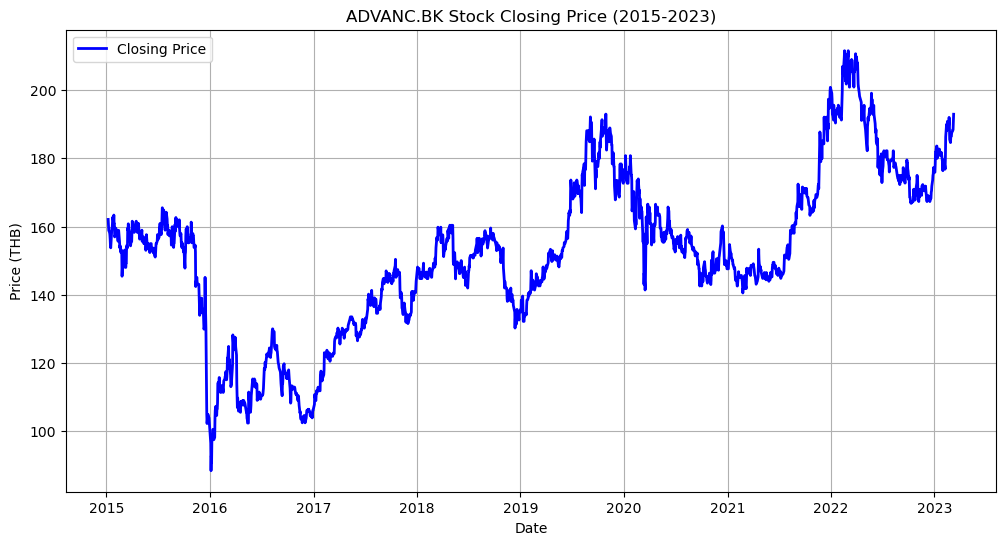

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Close'], label="Closing Price", linewidth=2, color='blue')

# เพิ่ม title และ labels
plt.title("ADVANC.BK Stock Closing Price (2015-2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()


In [45]:
# Download stock data
stock_symbol = "ADVANC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")

# Feature engineering: Create lag features (previous days' closing prices)
for i in range(1, 6):  # Lags for previous 5 days
    df2[f'Close_Lag_{i}'] = df2['Close'].shift(i)

# Drop rows with missing values
df2.dropna(inplace=True)

# Use 'Close' as the target variable and lag features as the input
X = df2[['Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = df2['Close']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (optional, especially important for models like XGBoost)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[*********************100%***********************]  1 of 1 completed


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------- Scaling ข้อมูล ----------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Linear Regression Model ----------
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Linear Regression MSE: {lr_mse:.2f}")

# ---------- Random Forest Model ----------
# ใช้ข้อมูลที่ไม่ได้ถูก Scale กับ Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")

# ---------- XGBoost Model ----------
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost MSE: {xgb_mse:.2f}")


Linear Regression MAE: 1.66
Linear Regression MSE: 6.92


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MAE: 1.85
Random Forest MSE: 7.87
XGBoost MAE: 1.82
XGBoost MSE: 8.33


In [51]:
# Load your stock data (ADVANC.BK)
stock_symbol = "ADVANC.BK"
df2 = yf.download(stock_symbol, start="2015-01-01", end="2023-03-11")

# Feature engineering: Create lag features (previous days' closing prices)
for i in range(1, 6):  # Lags for previous 5 days
    df2[f'Close_Lag_{i}'] = df2['Close'].shift(i)

# Drop rows with missing values
df2.dropna(inplace=True)

# Prepare the feature matrix (X) and target vector (y)
X = df2[['Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = df2['Close']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for LSTM model (scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (3D array: [samples, time steps, features])
X_train_lstm = np.array(X_train_scaled).reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X_train_lstm, y_train, epochs=20, verbose=1)

# Predict with LSTM model
y_pred_lstm = model.predict(X_test_lstm)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print(f"MAPE - LSTM: {mape_lstm:.4f}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23729.4961 
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18983.2520
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 834.4586
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323.2784
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.3676
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.5768
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3873
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2079
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7983
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8098
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8779
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6447
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6291
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9060
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2466
Epoch 16/20
5

[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


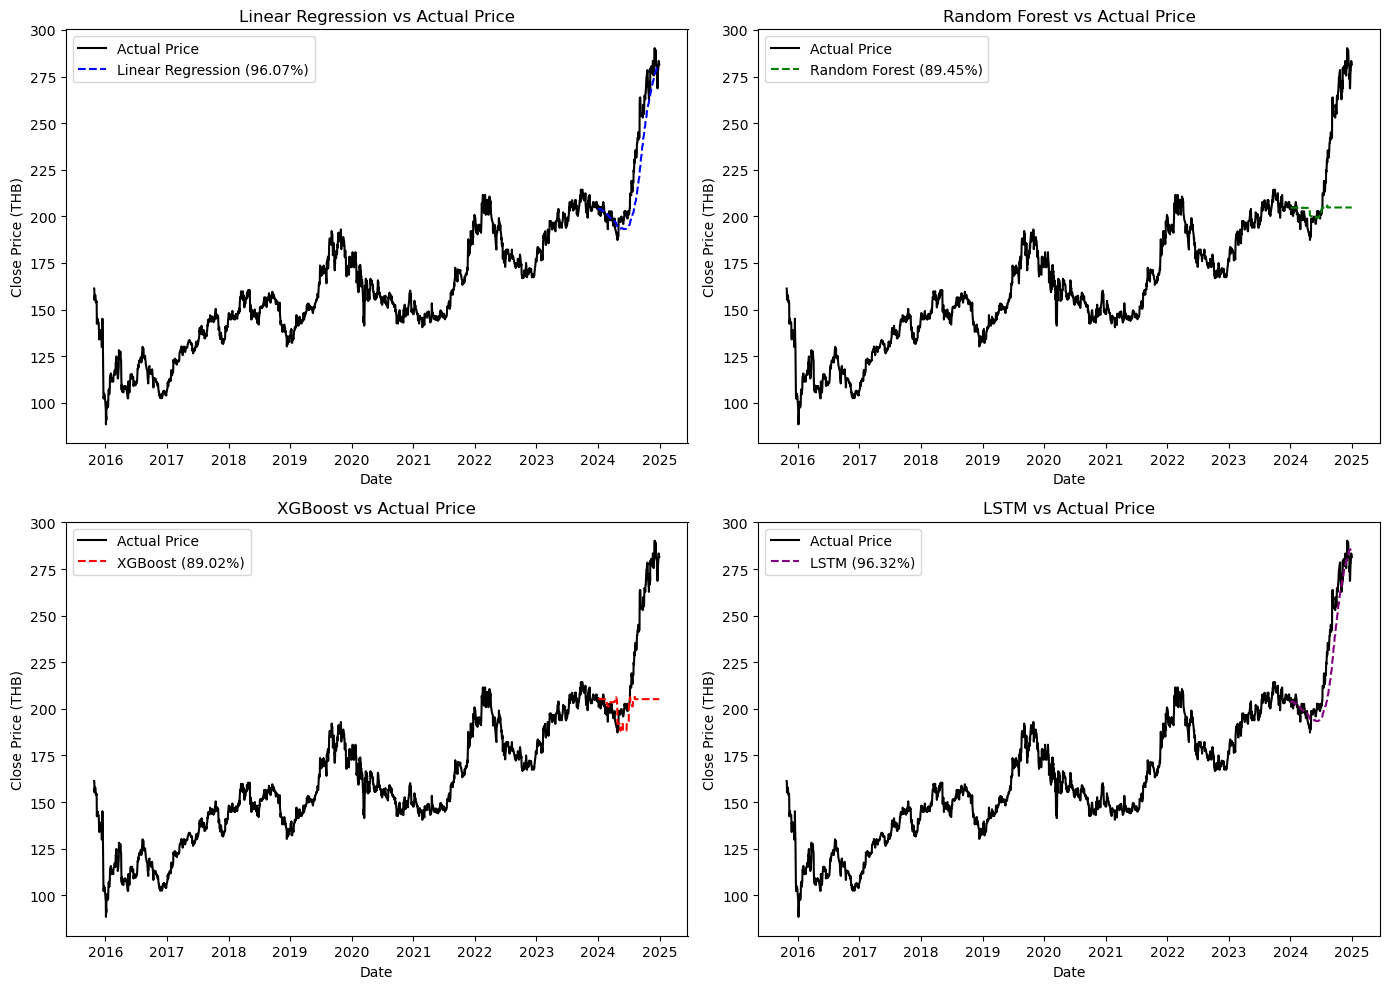

In [41]:
# โหลดข้อมูลหุ้น ADVANC.BK (ถึงปี 2024)
ticker = "ADVANC.BK"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']  # ใช้ข้อมูลถึงปี 2023 เป็น Train Data
test = data.loc['2024']  # ใช้ปี 2024 เป็น Test Data โดยใช้ .loc เพื่อเลือกปี 2024

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")


📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 96.07%
Random Forest: 89.45%
XGBoost: 89.02%
LSTM: 96.32%
